# **Chapter 1:** Introduction, descriptive statistics, Python and data visualization



## Table of Contents
0. [Forelæsningsnoter](#0)
1. [Measures of centrality:](#1)
    * 1.1.[Mean](#11)
    1. [Median]
    2. [Quantiles]
2. [Measures of variability:](#2)
    1. [Variance]
    2. [Standard deviation]
    3. [Coefficient of variation]
    4. [Inter quartile Range (IQR)]
3. [Measures of relation: correlation and covariance:](#3)
4. [Exercises](#5)

All plots:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp

# **0. Forelæsningsnoter**

**Statistical population**

* Population: N, 

* Stikprøve: n

Stikprøven bliver almindeligvis repræsenteret med en vektor 
$$ x = (x_1, x_2, ..x_n)$$ 

Stikprøve gennemsnittet er et estimat af populations middelværdi 

**Stikprøvevarians:**
$$ s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

**Stikprøvestandardafvigelse:**
$$ \sqrt{s^2}$$

**Varriatioskoefficient:**
$$CV = \frac{s}{\bar{x}}$$

# **1. Measures of centrality**

### 1.1 Mean

In [2]:
import numpy as np

x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])

mean = np.mean(x)

print(f"Sample Mean: {mean}")



Sample Mean: 178.0


### 1.2 Median

In [3]:
median = np.median(x)
print(median)

179.0


### 1.3 Example of median and mean

In [4]:
x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
mean = np.mean(x)
median = np.median(x)
print(f"Sample Mean: {mean}")
print(f"Sample Median: {median}")


Sample Mean: 178.0
Sample Median: 179.0


### 1.4 Quantiles and percentiles

Medianen beregnes som det punkt, der deler data ind i to halvdele. Mere
generelt kan vi beregne fraktiler. Ofte beregner man:

* 0%,25%,50%,75%,100%-fraktilerne

* Median is the 50% quantile, also called the 50p'th percentile

* 25%, 50%, and 75% are called first, second and third quartiles

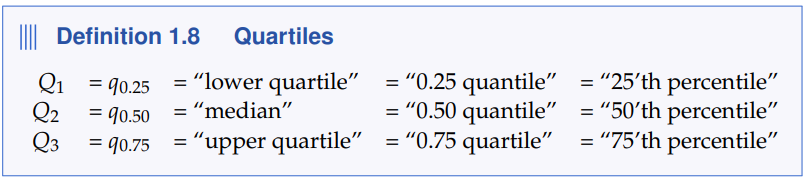


* The inter Quartile range:  $$ITQ = Q3 - Q1$$



The p quantile $$q_p$$ can be defined from the following:

* Sort n observations from lowest to largest: $$(x_(1), x_(2), ..., x_(n)$$
  
* Calculate pn
  
* If pn is a integer: take the mean of the pn'te and the (pn+1)'te ordered observation: $$\frac{q_p=(x_(np)+x_(np+1)}{2}$$
  
* If pn is not an integer:
  $$q_p=x(\lceil{np}\rceil)$$

where \lceil{np}\rceil is the ceiling, that is det smallest integer bigger than np. So we round up np to the nearest integer

### 1.5 Example heights of students

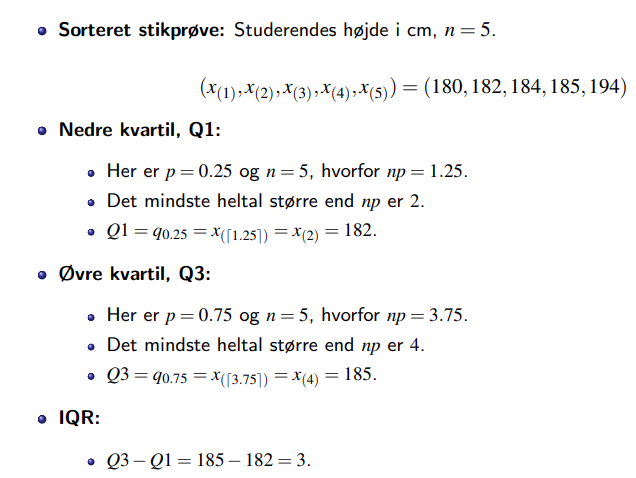

In python:

In [5]:
# x = [168, 161, 167, 179, 184, 166, 198, 187, 191, 179]
percentiles_custom = np.percentile(x, [0,25,50,75,100], method='averaged_inverted_cdf')
print(f"Custom Method Percentiles: {percentiles_custom}")

Custom Method Percentiles: [161. 167. 179. 187. 198.]


You can also generate percentiles using range(start, stop, step) (recall that Python is "left inclusive, right exclusive"). For instance:


In [6]:
np.percentile(x, list(range(0,110,10)), method='averaged_inverted_cdf')


array([161. , 163.5, 166.5, 167.5, 173.5, 179. , 181.5, 185.5, 189. ,
       194.5, 198. ])

**Exsteme observations** = 1.5 · IQR

# **2. Measures of variability**

A crucial aspect to understand when dealing with statistics is the concept of variability - the obvious fact that not everyone in a population, nor in a sample, will be exactly the same. 

If that was the case they would all equal the mean of the population or sample. 

But different phenomena will have different degrees of variation: An adult (non dwarf) height population will maybe spread from around 150 cm up to around 210 cm with very few exceptions. 

A kitchen scale measurement error population might span from −5 g to +5 g. We need a way to quantify the degree of variability in a population and in a sample. 

The most commonly used measure of sample variability is the sample variance or its square root, called the sample standard deviation:

## 2.1 Sample varians

The sample variance of a sample $$x_1, . . . , x_n$$ is the sum of squared differences from the sample mean divided by n − 1:


In [7]:
variance = np.var(x, ddof=1) #Calculating variance

print(f"Sample Variance: {variance}")

Sample Variance: 149.11111111111111


## 2.2 Sample deviation

The sample standard deviation is the square root of the sample variance

In [8]:
std_dev = np.std(x, ddof=1)

print(f"Sample Standard Deviation: {std_dev}")

Sample Standard Deviation: 12.211106056009468


## 2.3 Coefficent of variation

If it is of interest to compare variation between different
samples, it might be a good idea to use a relative measure - most obvious is the coefficient of variation:

The coefficient of variation is the sample standard deviation seen relative to the sample mean:

$$ V = \frac{s}{\bar{x}}$$


We interpret the standard deviation as the average absolute deviation from the mean or simply: the average level of differences, and this is by far the most used measure of spread. 

## 2.4 Example of variance and standard deviation

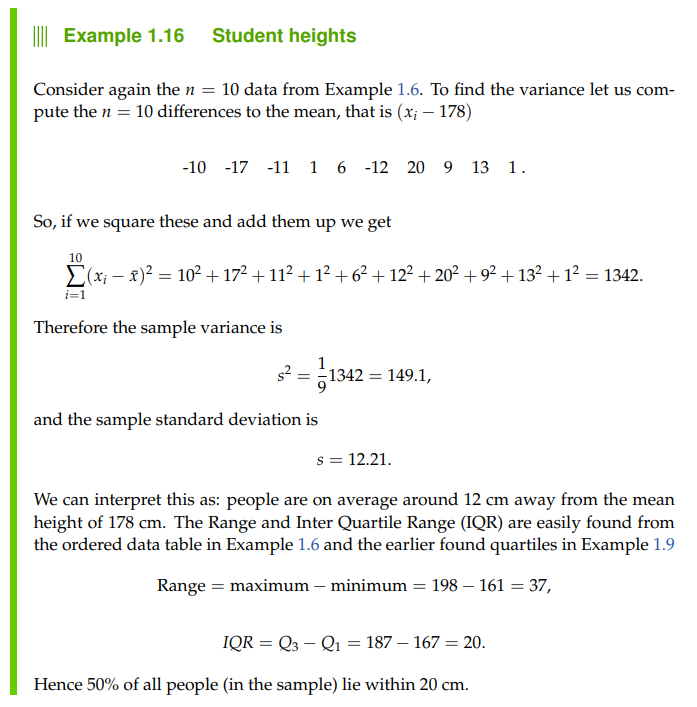

In [9]:
differences = x - mean
squared_differences = differences ** 2
variance = np.var(x, ddof=1)
std_dev = np.std(x, ddof=1)
print(f"Sample Variance: {variance}")
print(f"Sample Standard Deviation: {std_dev}")


Sample Variance: 149.11111111111111
Sample Standard Deviation: 12.211106056009468


## 2.5 Range

The range of the sample is

$$ Range=Maximum-minimum = Q4-Q0=x_(n)-x_(1)$$


# **3. Measures of relation: correlation and covariance**

When two observational variables are available for each observational unit, it may be of interest to quantify the relation between the two, that is to quantify how the two variables co-vary with each other, their sample covariance and/or sample correlation.


When two observational variables are available for each observational unit, their relationship can be quantified using covariance and correlation.

## 3.1 Covariance

Covariance is a statistical measure that describes the extent to which two variables change together. It indicates the direction of the linear relationship between two variables:

* Positive Covariance: If the covariance is positive, it means that as one variable increases, the other variable tends to increase as well. For example, if both temperature and ice cream sales increase together, their covariance would be positive.

* Negative Covariance: If the covariance is negative, it means that as one variable increases, the other variable tends to decrease. For example, if temperature increases but the sales of winter coats decrease, their covariance would be negative.

* Zero Covariance: If the covariance is zero, it means there is no linear relationship between the variables.


**Example:**
If you're measuring the height and weight of a group of people, and you find that taller people tend to weigh more, the covariance between height and weight will be positive.

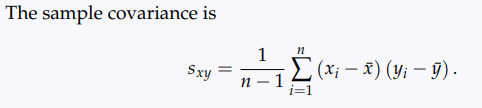

In [10]:
# Example: Calculating covariance and correlation
y = np.array([65.5, 58.3, 68.1, 85.7, 80.5, 63.4, 102.6, 91.4, 86.7, 78.9])
covariance = np.cov(x, y, ddof=1)[0, 1]

print(f"Sample Covariance: {covariance}")

Sample Covariance: 165.92222222222222


## 3.2 Correlation

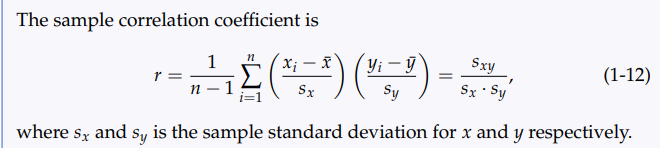

In [11]:
# Example: Calculating covariance and correlation
y = np.array([65.5, 58.3, 68.1, 85.7, 80.5, 63.4, 102.6, 91.4, 86.7, 78.9])
correlation = np.corrcoef(x, y)[0, 1]
print(f"Sample Correlation: {correlation}")

Sample Correlation: 0.9656034339405127


## 3.3 Example 

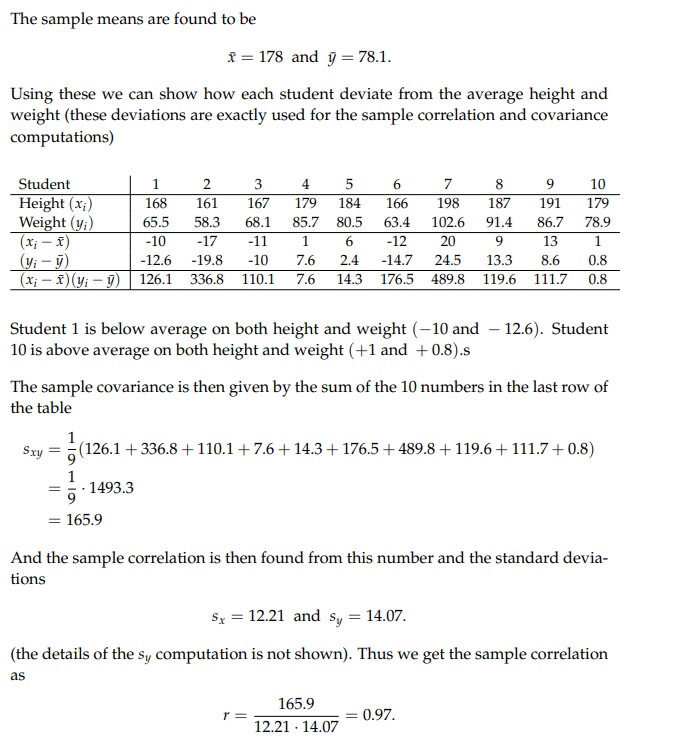

<function matplotlib.pyplot.show(close=None, block=None)>

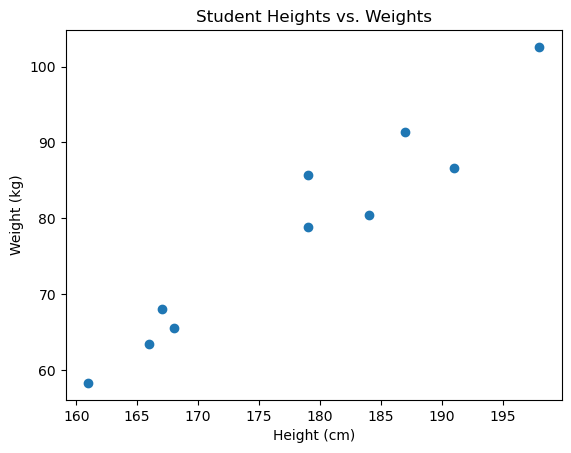

In [12]:
import matplotlib.pyplot as plt
x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
y = np.array([65.5, 58.3, 68.1, 85.7, 80.5, 63.4, 102.6, 91.4, 86.7, 78.9])
plt.scatter(x,y)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Student Heights vs. Weights')
plt.show

In [13]:
# Covariance and correlation
covariance = np.cov(x, y, ddof=1)[0, 1]
correlation = np.corrcoef(x, y)[0, 1]
print(f"Sample Covariance: {covariance}")
print(f"Sample Correlation: {correlation}")

Sample Covariance: 165.92222222222222
Sample Correlation: 0.9656034339405127


# **4. Plotting, Graphics - Data Visualization**

### 4.1 Frequency Distributions and the Histogram

The frequency distribution is the count of occurrences of values in the sample for different classes using some classification, for example in intervals or by some other property. It is nicely depicted by the histogram, which is a bar plot of the occurrences in each class.

#### Example 1.25: Histogram in Python

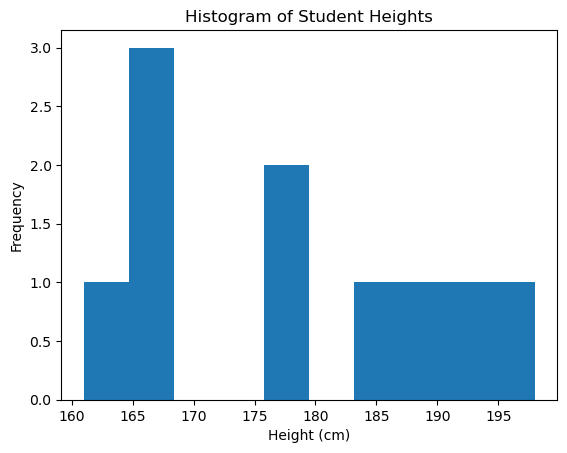

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: heights of students
x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])

# A histogram of the heights
plt.hist(x)
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Student Heights")
plt.show()

## 4.2 Empirical Density

The empirical density, or density histogram, shows the distribution of the sample by normalizing the frequency of the classes.

### Example 1.26: Empirical Density in Python

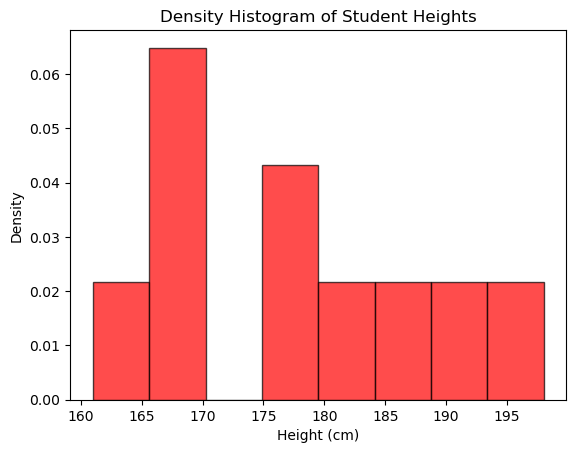

In [15]:
# A density histogram or empirical density of the heights
plt.hist(x, bins=8, edgecolor='black', color='red', alpha=0.7, density=True)
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.title("Density Histogram of Student Heights")
plt.show()

## 4.3 Cumulative Distributions

The cumulative distribution can be visualized simply as the cumulated relative frequencies either across classes or individual data points, which is then called the empirical cumulative distribution function.


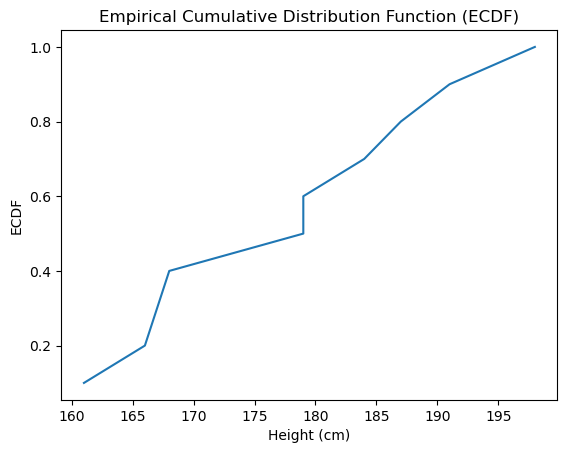

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp

ecdf = ECDF(x)
plt.plot(ecdf.x, ecdf.y)
plt.xlabel("Height (cm)")
plt.ylabel("ECDF")
plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.show()

## 4.4 The Box Plot and the Modified Box Plot

The box plot in its basic form depicts the five quartiles (min, Q1, median, Q3, max) with a box from Q1 to Q3 emphasizing the Inter Quartile Range (IQR).


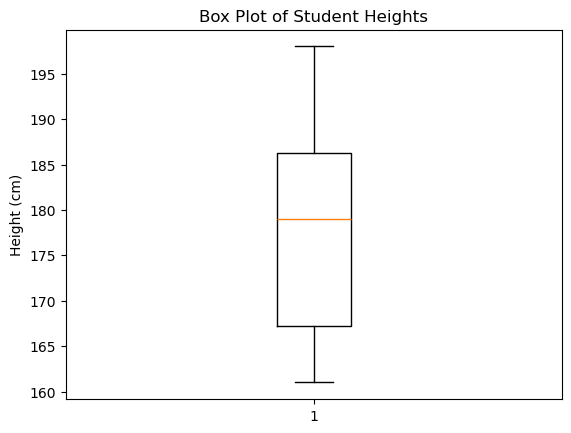

In [17]:
# Box plot of the heights
plt.boxplot(x)
plt.ylabel("Height (cm)")
plt.title("Box Plot of Student Heights")
plt.show()

Example 1.29: Modified Box Plot in Python
If we add an extreme observation, 235 cm, to the heights sample and make the modified box plot - the default - and the basic box plot, then we have:

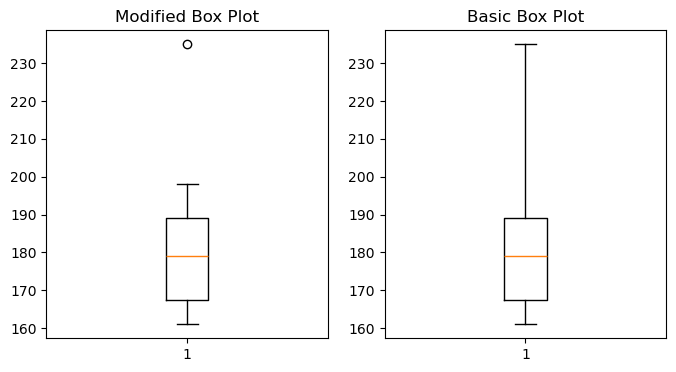

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
x_with_outlier = np.append(x, [235])

# Default whiskers
ax1.boxplot(x_with_outlier)
ax1.set_title("Modified Box Plot")

# Whiskers covering 100% of the data
ax2.boxplot(x_with_outlier, whis=(0, 100))
ax2.set_title("Basic Box Plot")

plt.show()


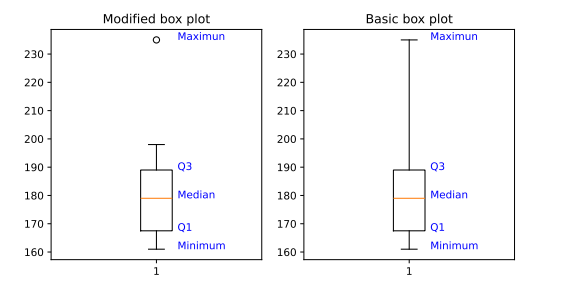

## 4.5 Box plot in python with dataset using pandas

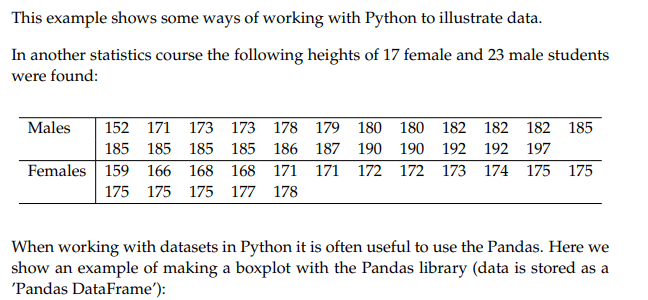

In [19]:
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp

<Axes: >

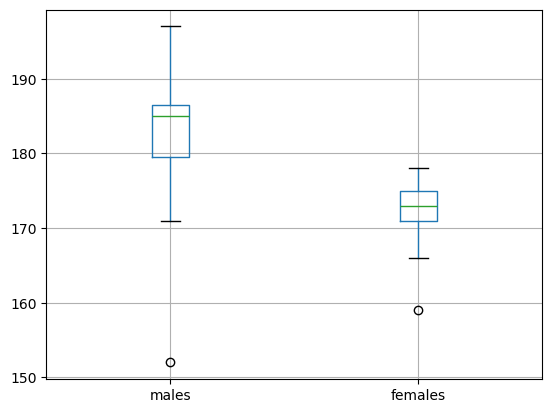

In [20]:
# Box plot with two groups
data = pd.DataFrame({
'males': [152, 171, 173, 173, 178, 179, 180, 180, 182, 182, 182,
185, 185, 185, 185, 185, 186, 187, 190, 190, 192, 192,
197],
'females':[159, 166, 168, 168, 171, 171, 172, 172, 173, 174, 175,
175, 175, 175, 175, 177, 178, np.nan, np.nan, np.nan,
np.nan, np.nan, np.nan]
})
data.boxplot()

## 4.6 Read and explore data in Python

The data can now be imported into Python using the Pandas function read_csv:

In [21]:
# Read the data (note that per default sep="," but here semicolon)
studentheights = pd.read_csv('studentheights.csv', sep=';')

The resulting object studentheights is now a Pandas DataFrame, which is very useful for working with tabular data in Python. There are some ways of getting a quick look at what kind of data is really in a DataFrame:

In [22]:
#Have a look at the first 6 rows of the data
studentheights.head()

,Height,Gender
0,152,male
1,171,male
2,173,male
3,173,male
4,178,male


In [23]:
# Get an overview
studentheights.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  40 non-null     int64 
 1   Gender  40 non-null     object
dtypes: int64(1), object(1)
memory usage: 772.0+ bytes


In [24]:
# Get a summary of each column/variable in the data
studentheights.describe(include='all')

,Height,Gender
count,40.00000,40
unique,NaN,2
top,NaN,male
freq,NaN,23
mean,177.87500,NaN
std,9.09265,NaN
min,152.00000,NaN
25%,172.75000,NaN
50%,177.50000,NaN
75%,185.00000,NaN


<Axes: title={'center': 'Height'}, xlabel='[Gender]'>

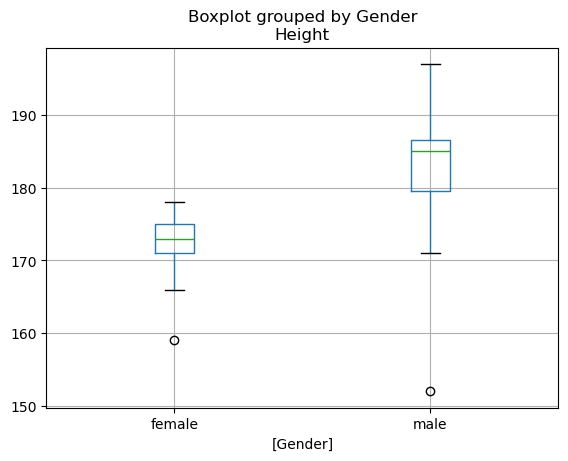

In [25]:
# Box plot for each gender
studentheights.boxplot(by='Gender')

## 4.6 The Scatter plot

The scatter plot can be used for two quantitative variables. It is simply one variable plotted versus the other using some plotting symbol.

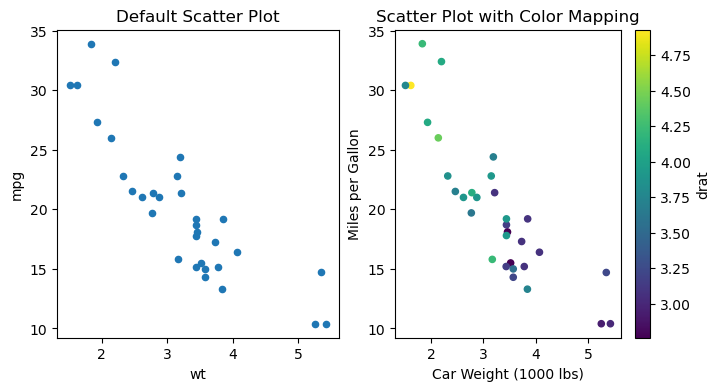

In [26]:
import pandas as pd
import statsmodels.api as sm

# Get mtcars data as a DataFrame
mtcars = sm.datasets.get_rdataset("mtcars").data

# To make 2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# First the default version
mtcars.plot.scatter('wt', 'mpg', ax=ax1)
ax1.set_title("Default Scatter Plot")

# Then a nicer version
mtcars.plot.scatter('wt', 'mpg', c='drat', colormap='viridis', ax=ax2)
ax2.set_title("Scatter Plot with Color Mapping")
ax2.set_xlabel("Car Weight (1000 lbs)")
ax2.set_ylabel("Miles per Gallon")

plt.show()

## 4.7 Bar Plots and Pie Charts

All the plots described so far were for quantitative variables. For categorical variables, the natural basic plot would be a bar plot or pie chart visualizing the relative frequencies in each category.

### Example 1.33: Bar Plots and Pie Charts

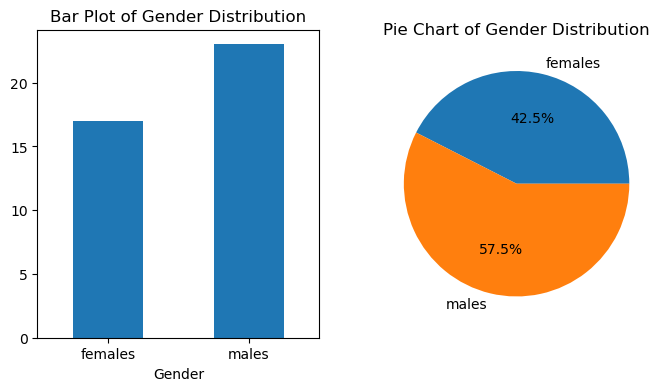

In [27]:
# Sample Data: Gender distribution
data = pd.DataFrame({
    'males': [152, 171, 173, 173, 178, 179, 180, 180, 182, 182, 182, 185, 185, 185, 185, 185, 186, 187, 190, 190, 192, 192, 197],
    'females': [159, 166, 168, 168, 171, 171, 172, 172, 173, 174, 175, 175, 175, 175, 175, 177, 178, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
})
studentheights = data.melt(var_name="Gender", value_name="Height").dropna()

# Table
gender_counts = studentheights.groupby('Gender').size()

# Barplot and Pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
gender_counts.plot(kind='bar', ax=ax1, rot=0)
ax1.set_title("Bar Plot of Gender Distribution")

gender_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_ylabel("")
ax2.set_title("Pie Chart of Gender Distribution")

plt.show()